# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 645


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
import requests
from api_keys import weather_api_key
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Set the parameters for the API request
    params = {
        "q": city,
        "units": "metric",
        "appid": weather_api_key
    }

    # Log the city and API request URL
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(f"{url}?{params}")

    # Send the API request and store the response data
    response = requests.get(url, params=params)



    # If the API request is successful, extract the weather data
    if response.status_code == 200:
        weather_data = response.json()

        # Extract the desired weather variables from the response
        city_lat = weather_data["coord"]["lat"]
        city_lng = weather_data["coord"]["lon"]
        city_max_temp = weather_data["main"]["temp_max"]
        city_humidity = weather_data["main"]["humidity"]
        city_clouds = weather_data["clouds"]["all"]
        city_wind = weather_data["wind"]["speed"]
        city_country = weather_data["sys"]["country"]
        city_date = weather_data["dt"]

        # Append the weather data to the city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # Increase the record count
        record_count += 1

    else:
        # If the API request is unsuccessful, skip the city
        print("City not found. Skipping...")

# Print the data retrieval complete message
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?{'q': 'mataura', 'units': 'metric', 'appid': '7be7cb5434365722286c670fda82ed7a'}
Processing Record 2 of Set 1 | katangli
http://api.openweathermap.org/data/2.5/weather?{'q': 'katangli', 'units': 'metric', 'appid': '7be7cb5434365722286c670fda82ed7a'}
Processing Record 3 of Set 1 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?{'q': 'attawapiskat', 'units': 'metric', 'appid': '7be7cb5434365722286c670fda82ed7a'}
City not found. Skipping...
Processing Record 3 of Set 1 | kamenka
http://api.openweathermap.org/data/2.5/weather?{'q': 'kamenka', 'units': 'metric', 'appid': '7be7cb5434365722286c670fda82ed7a'}
Processing Record 4 of Set 1 | tsihombe
http://api.openweathermap.org/data/2.5/weather?{'q': 'tsihombe', 'units': 'metric', 'appid': '7be7cb5434365722286c670fda82ed7a'}
City not found. Skipping...
Processing Record 4 of Set 1 | bluf

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,8.53,64,86,1.18,NZ,1680818293
1,katangli,51.7102,143.2326,-1.38,90,100,6.97,RU,1680818293
2,kamenka,51.3223,42.7678,10.46,68,100,5.14,RU,1680818293
3,bluff,-46.6000,168.3333,9.86,67,65,3.94,NZ,1680818294
4,ushuaia,-54.8000,-68.3000,11.81,43,75,7.72,AR,1680818189


In [53]:
# Export the City_Data into a csv
# Create the output_data directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,8.53,64,86,1.18,NZ,1680818293
1,katangli,51.7102,143.2326,-1.38,90,100,6.97,RU,1680818293
2,kamenka,51.3223,42.7678,10.46,68,100,5.14,RU,1680818293
3,bluff,-46.6000,168.3333,9.86,67,65,3.94,NZ,1680818294
4,ushuaia,-54.8000,-68.3000,11.81,43,75,7.72,AR,1680818189


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

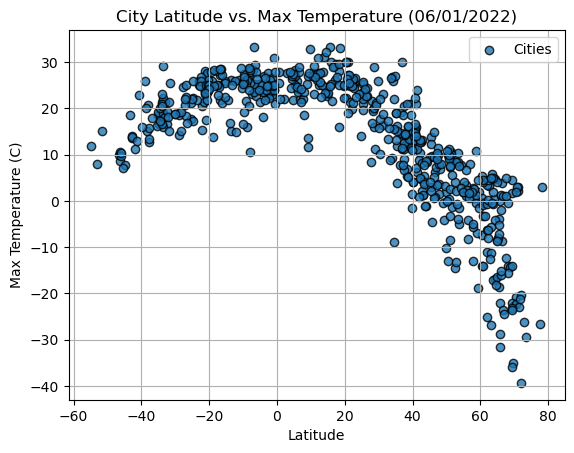

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Set x-axis label and y-axis label
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Set title and legend
plt.title("City Latitude vs. Max Temperature (06/01/2022)")
plt.legend(loc="best")

# Set grid line
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

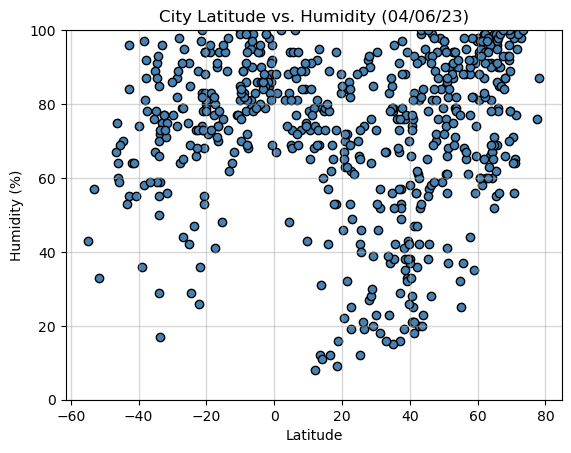

In [56]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Set title and labels for axes
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set y-axis limit
plt.ylim(0, 100)
plt.grid(True)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

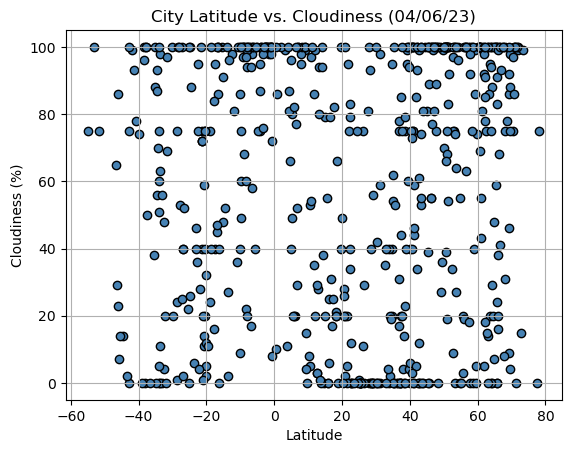

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

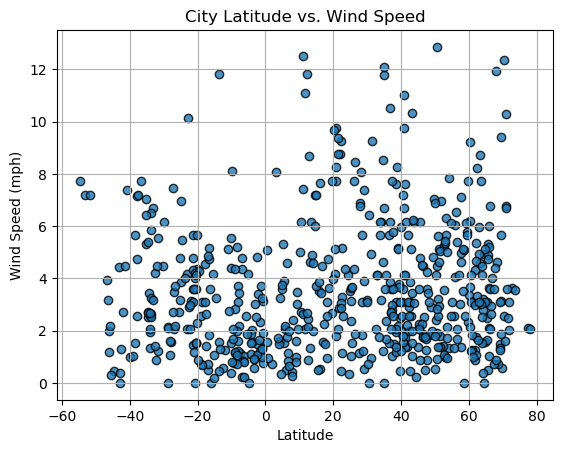

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot with linear regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,katangli,51.7102,143.2326,-1.38,90,100,6.97,RU,1680818293
2,kamenka,51.3223,42.7678,10.46,68,100,5.14,RU,1680818293
8,scarborough,54.2797,-0.4044,7.76,90,100,1.34,GB,1680818295
9,kodiak,57.7900,-152.4072,2.73,44,0,4.63,US,1680818295
10,margate,51.3813,1.3862,8.72,82,54,1.79,GB,1680818295


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,8.53,64,86,1.18,NZ,1680818293
3,bluff,-46.6000,168.3333,9.86,67,65,3.94,NZ,1680818294
4,ushuaia,-54.8000,-68.3000,11.81,43,75,7.72,AR,1680818189
5,east london,-33.0153,27.9116,21.29,75,0,6.69,ZA,1680818294
6,carnarvon,-24.8667,113.6333,22.30,69,26,6.95,AU,1680818294


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7329151997541473


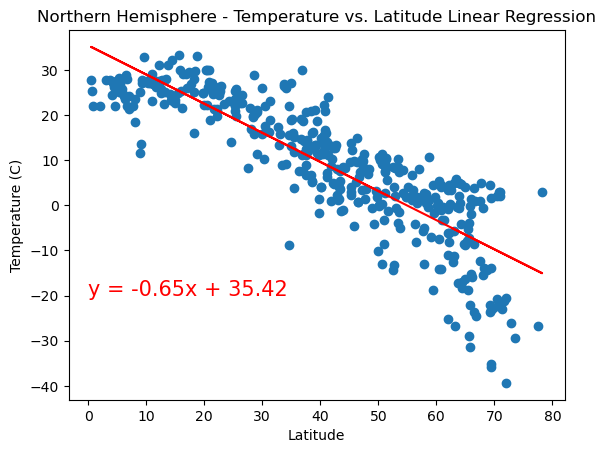

In [62]:
# Set x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate line equation
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

# Add title and labels
plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.6682698229579155


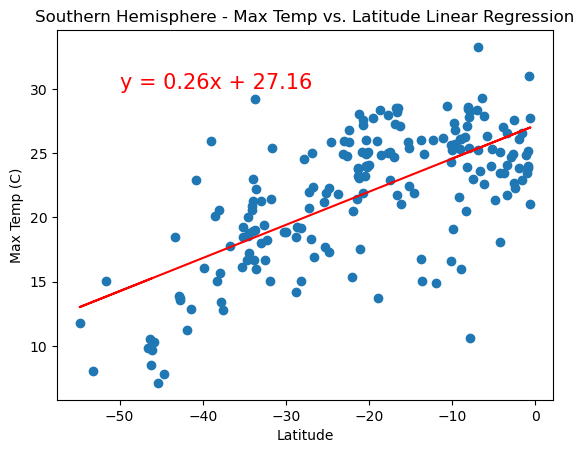

In [63]:
# Perform a linear regression on temperature vs. latitude for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate plot with equation
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44492414124864343


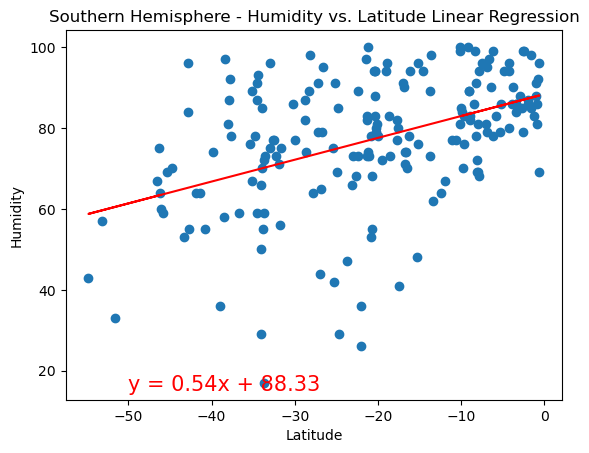

In [64]:

# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()


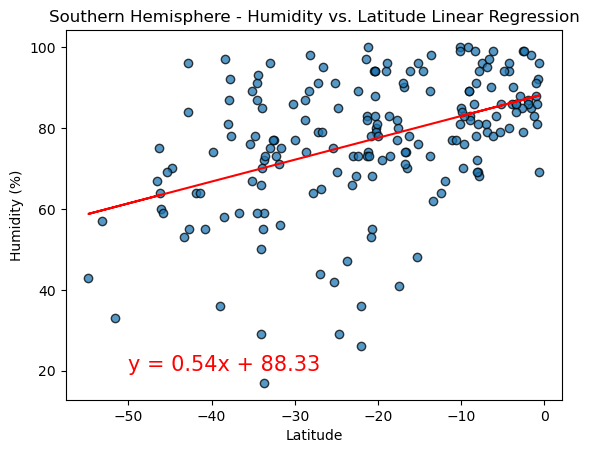

In [65]:
# Create scatter plot for latitude vs. humidity in Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolor="black", alpha=0.75)

# Add linear regression line and equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")




# Show plot
plt.show()


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05009952456851097


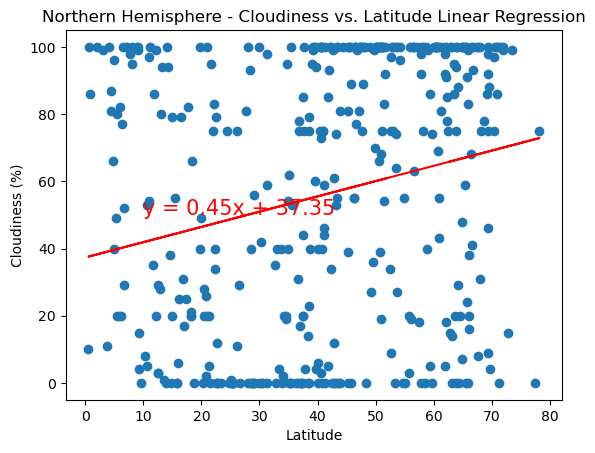

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)

# Add the regression line
plt.plot(x_values,regress_values,"r-")

# Add line equation to plot
plt.annotate(line_eq,(10,50),fontsize=15,color="red")

# Add chart labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.3317532197376084


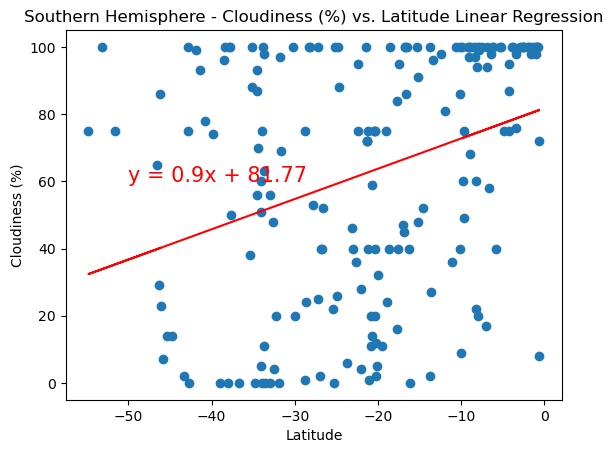

In [67]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue}")



# Show plot
plt.show()


**Discussion about the linear relationship:** It appears that there is no significant linear association between latitude and any of the meteorological variables examined, according to scatter plots and developed linear regression models.However, it is possible to spot some patterns:

Temperature: The relationship between latitude and temperature is unmistakably negative, with temperatures falling as latitude rises. This is compatible with the fact that temperatures are greater at the equator than they are at the poles due to the equator receiving more direct sunlight.

Humidity: Although there seems to be a marginally positive link in the Northern Hemisphere, there doesn't seem to be a major correlation between humidity and latitude.

Cloudiness: Despite a number of data points, there is no obvious correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 8.473716436679422e-06


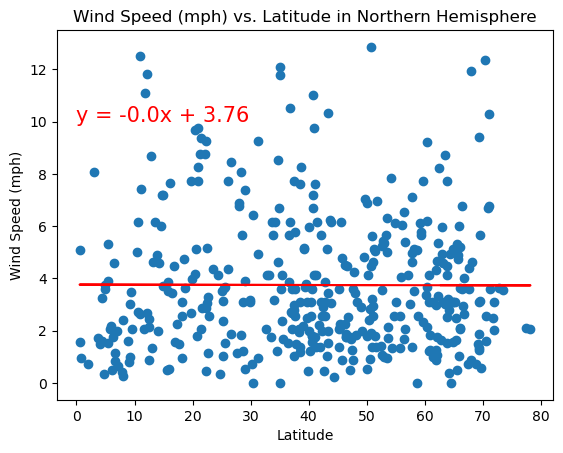

In [68]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-squared is: 0.0814192481640312


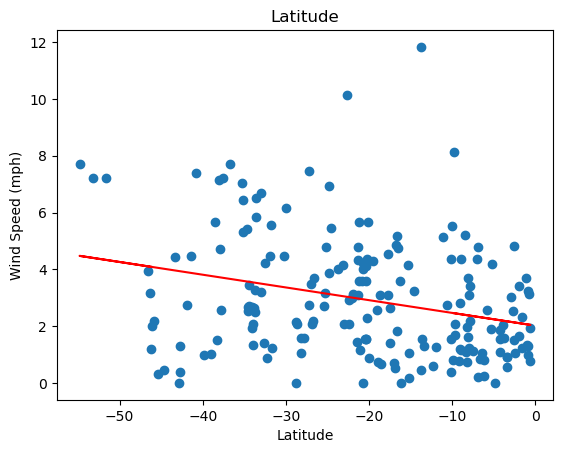

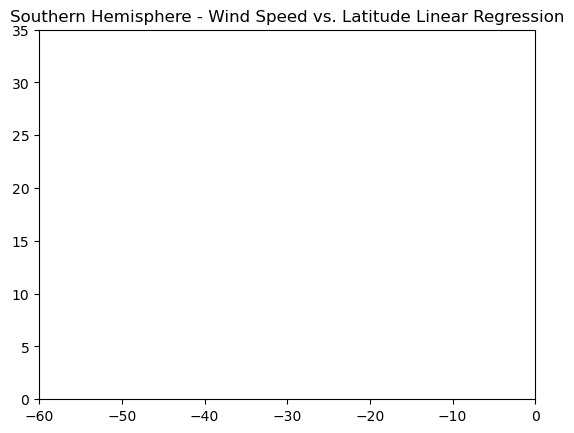

In [69]:
# Create plot and regression for Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function to create the linear regression plots
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed (mph)', (-50,20))

# Set plot properties
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 35)


# Show plot
plt.show()





**Discussion about the linear relationship:** YOUR RESPONSE HERE